In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
df = pd.read_csv('Company_Bankruptcy/data.csv')
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
# Check datatypes, all numeric data
data_type_counts = df.dtypes.value_counts()
print(data_type_counts)

float64    93
int64       3
Name: count, dtype: int64


In [ ]:
len(df.columns)

96

In [ ]:
#Null Value Columns
nullseries= df.isna().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


In [ ]:
x = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

# Use K-Fold Later
from sklearn.model_selection import train_test_split
# Split the dataset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<ipython-input-27-023b42e01a3e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
<ipython-input-27-023b42e01a3e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels


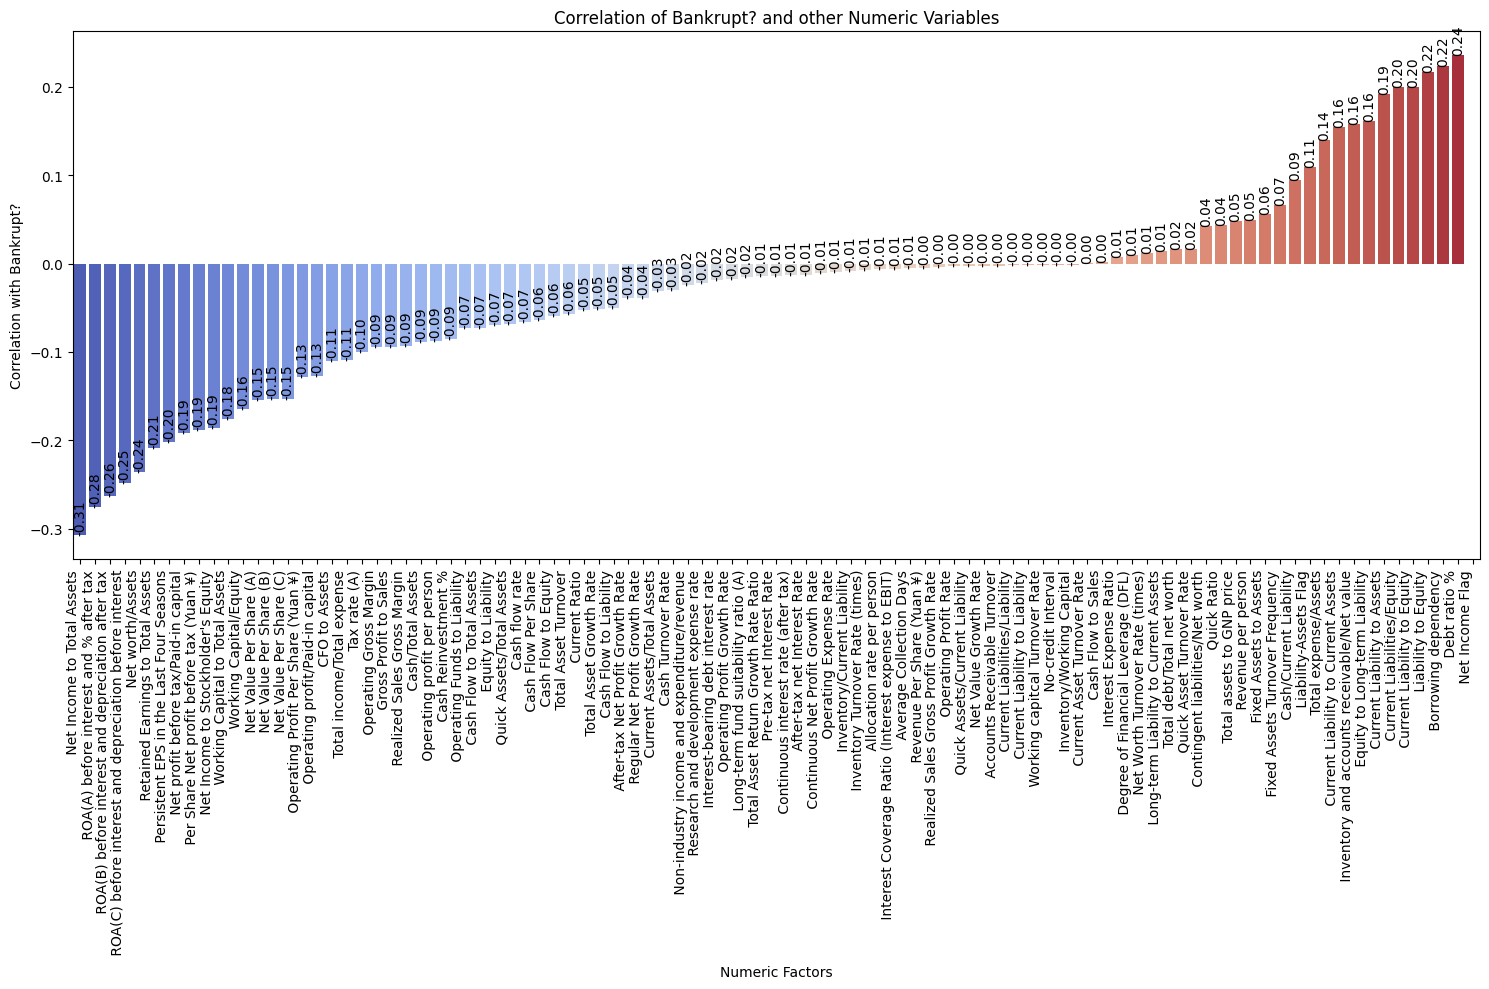

In [ ]:
#Create heat map of all numeric variables
# Select only numeric variables
x_numeric = x_train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
train_data = pd.concat([x_numeric, y], axis=1)
correlation_matrix = train_data.corr()
correlation_matrix = correlation_matrix['Bankrupt?'].drop('Bankrupt?').sort_values()
correlation_matrix=correlation_matrix.sort_values()

# Plot barplot for correlation
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
plt.title('Correlation of Bankrupt? and other Numeric Variables')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha='right')  # Rotate x-axis labels
plt.xlabel('Numeric Factors')
plt.ylabel('Correlation with Bankrupt?')
for index, value in enumerate(correlation_matrix):
    plt.text(index, value, f'{value:.2f}', rotation=90, ha='center', va='bottom')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

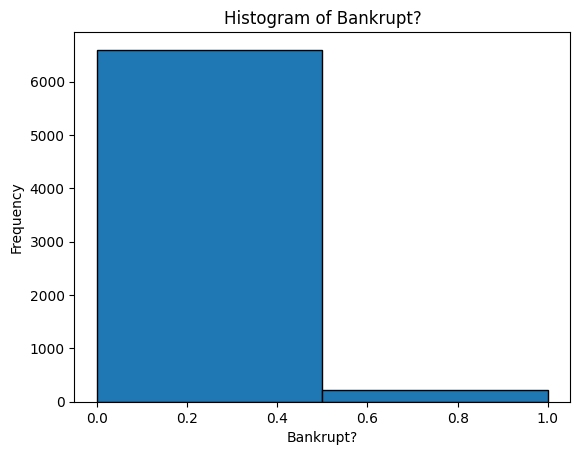

In [ ]:
#Create Histogram
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Bankrupt?' is the column name
plt.hist(df['Bankrupt?'], bins=2, edgecolor='black')  # Assuming binary data, adjust 'bins' as needed
plt.xlabel('Bankrupt?')
plt.ylabel('Frequency')
plt.title('Histogram of Bankrupt?')
plt.show()

Binary columns:
Index(['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag'], dtype='object')


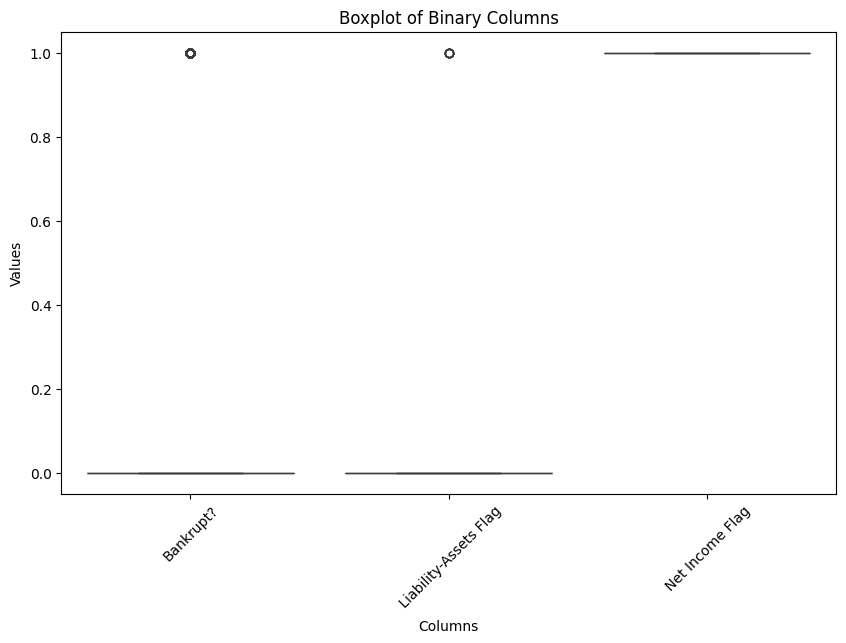

In [ ]:
#Check Binary Column
binary_columns = df.select_dtypes(include=['int64']).columns

# Display the selected columns
print("Binary columns:")
print(binary_columns)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[binary_columns])
plt.title('Boxplot of Binary Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Columns with max value greater than 1:
 Operating Expense Rate                   9.990000e+09
 Research and development expense rate    9.980000e+09
 Interest-bearing debt interest rate      9.900000e+08
 Revenue Per Share (Yuan ¥)               3.020000e+09
 Total Asset Growth Rate                  9.990000e+09
 Net Value Growth Rate                    9.330000e+09
 Current Ratio                            2.750000e+09
 Quick Ratio                              9.230000e+09
 Total debt/Total net worth               9.940000e+09
 Accounts Receivable Turnover             9.740000e+09
 Average Collection Days                  9.730000e+09
 Inventory Turnover Rate (times)          9.990000e+09
 Fixed Assets Turnover Frequency          9.990000e+09
 Revenue per person                       8.810000e+09
 Allocation rate per person               9.570000e+09
 Quick Assets/Current Liability           8.820000e+09
 Cash/Current Liability                   9.650000e+09
 Inventory/Current Liabili

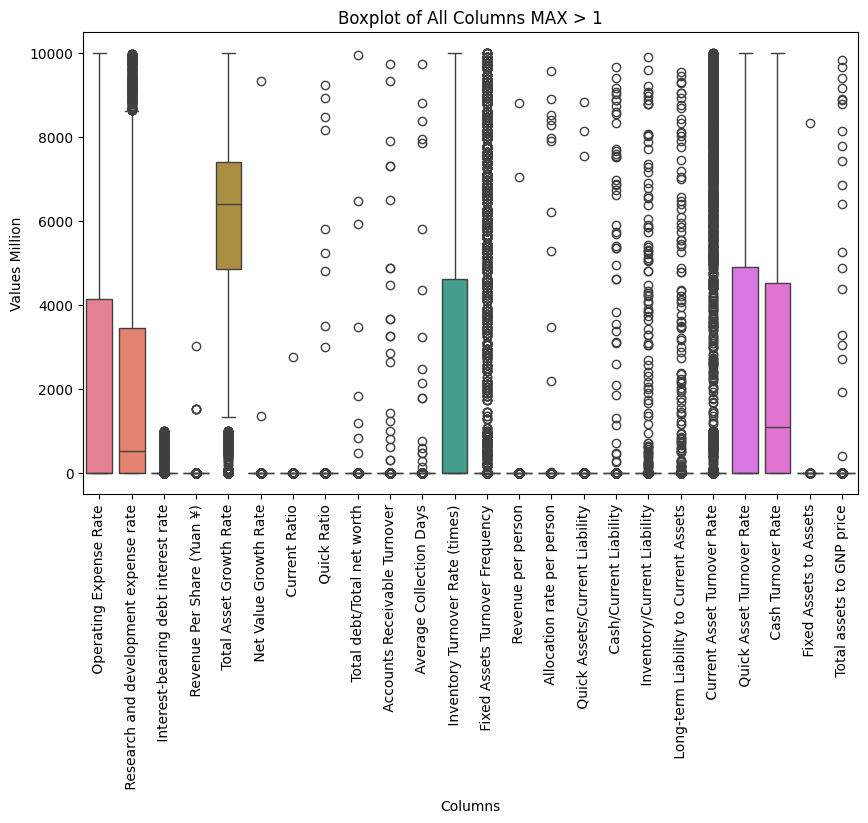

In [ ]:
#Check Column with max value greater than 1
column_max = df.max()

# Filter out columns with average value greater than 1
columns_greater_than_1 = column_max[column_max > 1]

# Display the columns with max value greater than 1
print("Columns with max value greater than 1:")
print(columns_greater_than_1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_greater_than_1.index]/1000000)
plt.title('Boxplot of All Columns MAX > 1')
plt.xlabel('Columns')
plt.ylabel('Values Million')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Columns with max value less than 1:
Bankrupt?                                                   1.0
 ROA(C) before interest and depreciation before interest    1.0
 ROA(A) before interest and % after tax                     1.0
 ROA(B) before interest and depreciation after tax          1.0
 Operating Gross Margin                                     1.0
                                                           ... 
 Liability to Equity                                        1.0
 Degree of Financial Leverage (DFL)                         1.0
 Interest Coverage Ratio (Interest expense to EBIT)         1.0
 Net Income Flag                                            1.0
 Equity to Liability                                        1.0
Length: 72, dtype: float64


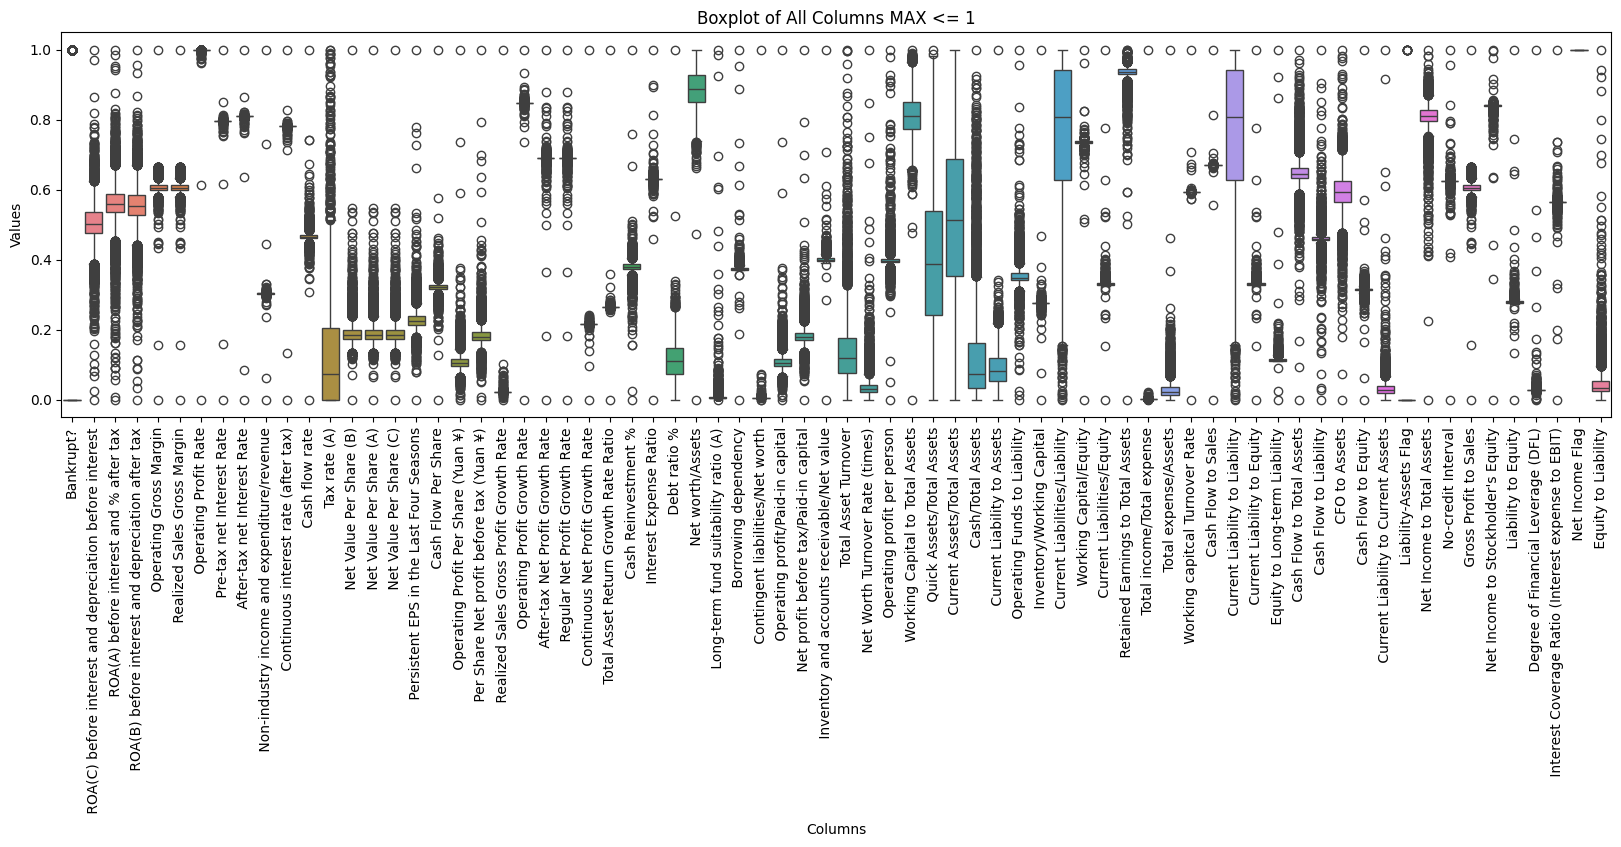

In [ ]:
#Check Column with max value greater than 1
column_max = df.max()

# Filter out columns with average value greater than 1
columns_less_than_1 = column_max[column_max <= 1]

# Display the columns with max value greater than 1
print("Columns with max value less than 1:")
print(columns_less_than_1)

plt.figure(figsize=(20, 5))
sns.boxplot(data=df[columns_less_than_1.index])
plt.title('Boxplot of All Columns MAX <= 1')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


rand_forest = RandomForestClassifier()

# Parameter Grid
param_grid = {
    'n_estimators': [10, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Grid Search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rand_forest, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Train on tuned logistic regression
best_params = grid_search.best_params_
tuned_rand_forest = RandomForestClassifier(**best_params)
tuned_rand_forest.fit(x_train_scaled, y_train)

# hyperparameter tuning
# 1. n_estimators (number of trees)
# 2. max_features (maximum features considered for splitting a node)
# 3. max_depth (maximum number of levels in each tree)
# 4. splitting criteria (entropy or gini)

RandomForestClassifier(max_depth=6)

In [ ]:
# Predict
rand_forest_y_train_pred = tuned_rand_forest.predict(x_train_scaled)
train_conf_matrix = confusion_matrix(y_train, rand_forest_y_train_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)
print("\nClassification Report (Training Data):\n", classification_report(y_train, rand_forest_y_train_pred))

# On testing data
rand_forest_y_test_pred = tuned_rand_forest.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, rand_forest_y_test_pred)
print("\nConfusion Matrix (Testing Data):\n", test_conf_matrix)
print("\nClassification Report (Testing Data):\n", classification_report(y_test, rand_forest_y_test_pred))

Confusion Matrix (Training Data):
 [[4631    0]
 [  84   58]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4631
           1       1.00      0.41      0.58       142

    accuracy                           0.98      4773
   macro avg       0.99      0.70      0.79      4773
weighted avg       0.98      0.98      0.98      4773


Confusion Matrix (Testing Data):
 [[1965    3]
 [  69    9]]

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.75      0.12      0.20        78

    accuracy                           0.96      2046
   macro avg       0.86      0.56      0.59      2046
weighted avg       0.96      0.96      0.95      2046



In [ ]:
# import required modules for performance evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 427.9555555555555, 'Predicted label')

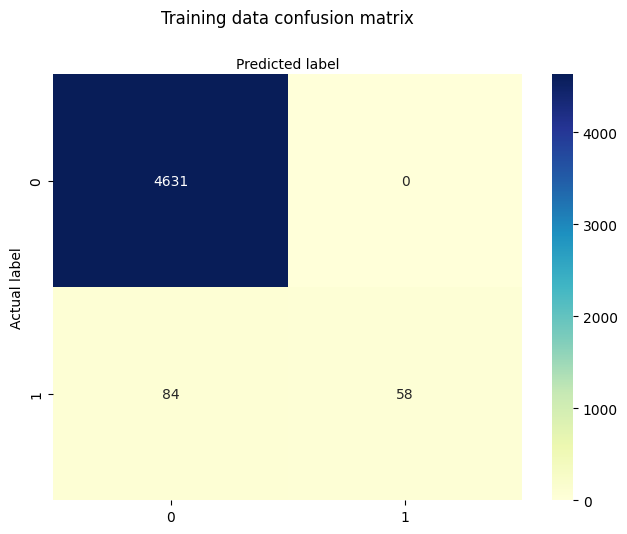

In [ ]:
# Training Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

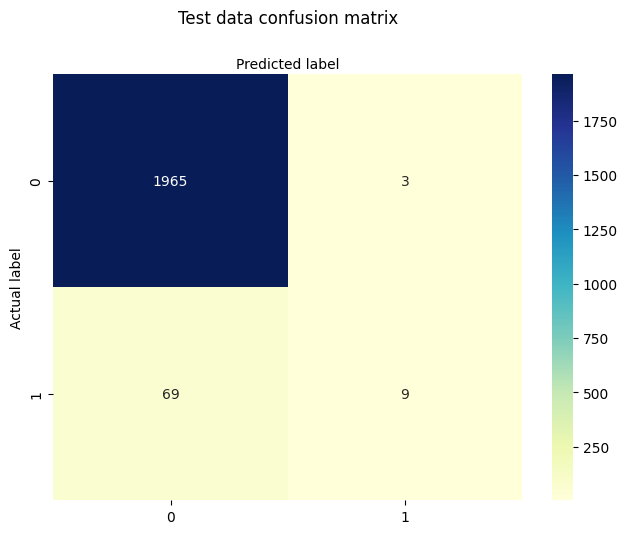

In [ ]:
# Testing Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

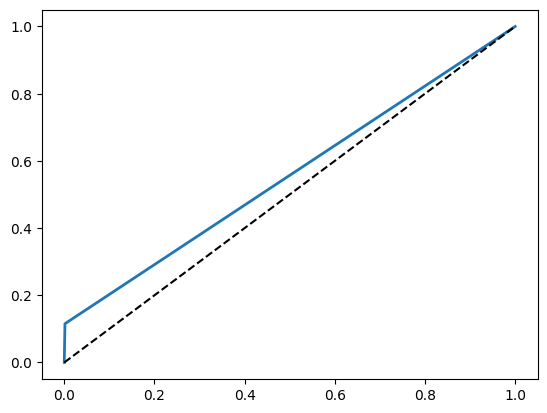

In [ ]:
# Random Forest ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rand_forest_y_test_pred)
plt.plot(fpr, tpr, linewidth=2, label="ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

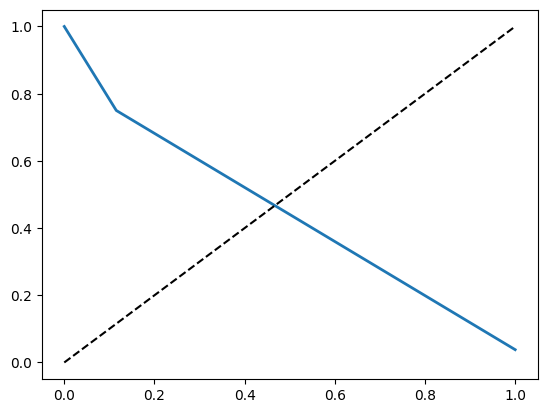

In [ ]:
# Random Forest Precision vs Recall
precision, recall, thresholds = precision_recall_curve(y_test, rand_forest_y_test_pred)
plt.plot(recall, precision, linewidth=2, label="Precision vs Recall")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [ ]:
# Random Forest F1 Score
f1_score(y_test, rand_forest_y_test_pred)

0.19999999999999998

In [ ]:
# Random Forest Best Params
best_params

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 100}

# Gradient Boosted Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


grad_boost = GradientBoostingClassifier()

# Parameter Grid
param_grid = {
    'n_estimators': [10, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 4, 6, 8, 10],
    'criterion': ['friedman_mse', 'squared_error'],
}

# Grid Search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(grad_boost, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Train on tuned logistic regression
best_params = grid_search.best_params_
tuned_grad_boost = GradientBoostingClassifier(**best_params)
tuned_grad_boost.fit(x_train_scaled, y_train)

GradientBoostingClassifier(max_depth=8, max_features='log2')

In [ ]:
# Predict
grad_boost_y_train_pred = tuned_grad_boost.predict(x_train_scaled)
train_conf_matrix = confusion_matrix(y_train, grad_boost_y_train_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)
print("\nClassification Report (Training Data):\n", classification_report(y_train, grad_boost_y_train_pred))

# On testing data
grad_boost_y_test_pred = tuned_grad_boost.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, grad_boost_y_test_pred)
print("\nConfusion Matrix (Testing Data):\n", test_conf_matrix)
print("\nClassification Report (Testing Data):\n", classification_report(y_test, grad_boost_y_test_pred))

Confusion Matrix (Training Data):
 [[4631    0]
 [   0  142]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4631
           1       1.00      1.00      1.00       142

    accuracy                           1.00      4773
   macro avg       1.00      1.00      1.00      4773
weighted avg       1.00      1.00      1.00      4773


Confusion Matrix (Testing Data):
 [[1962    6]
 [  66   12]]

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.67      0.15      0.25        78

    accuracy                           0.96      2046
   macro avg       0.82      0.58      0.62      2046
weighted avg       0.96      0.96      0.95      2046



In [ ]:
# import required modules for performance evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 427.9555555555555, 'Predicted label')

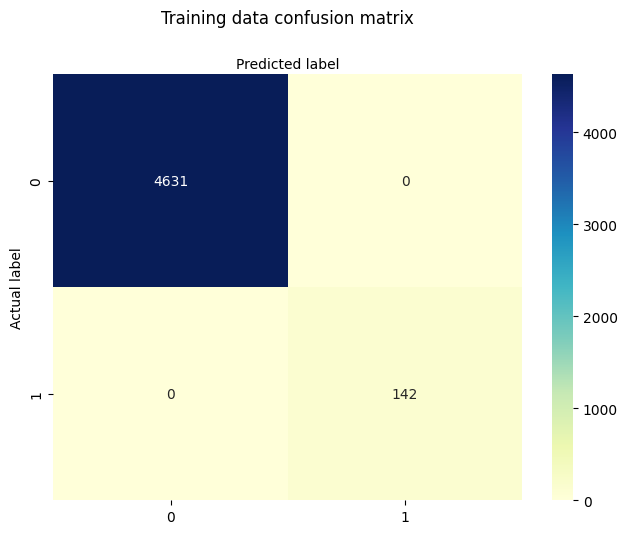

In [ ]:
# Training Data confusion matrix for gradient boost
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

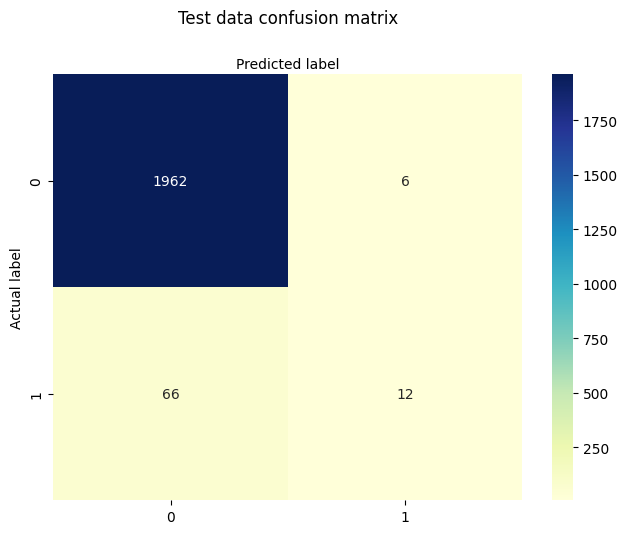

In [ ]:
# Test Data confusion matrix for gradient boost
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

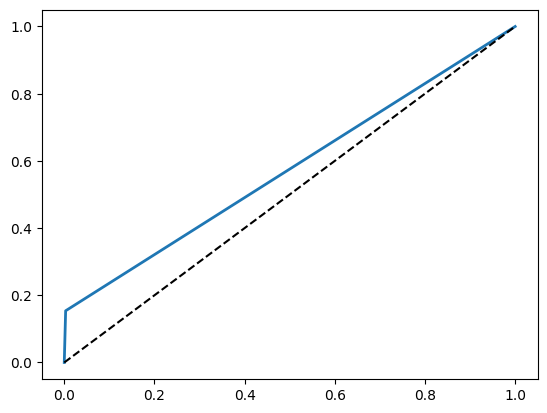

In [ ]:
# Gradient Boosting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, grad_boost_y_test_pred)
plt.plot(fpr, tpr, linewidth=2, label="ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

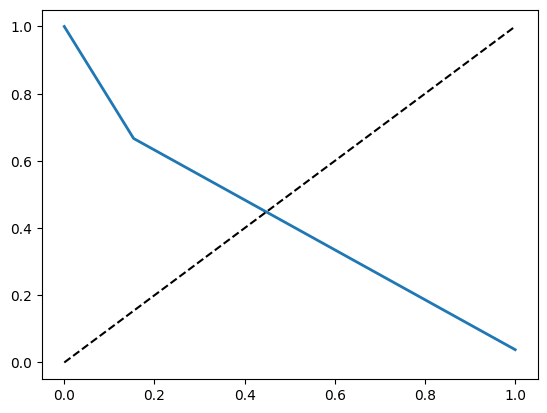

In [ ]:
# Gradient Boosting Precision vs Recall
precision, recall, thresholds = precision_recall_curve(y_test, grad_boost_y_test_pred)
plt.plot(recall, precision, linewidth=2, label="Precision vs Recall")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [ ]:
# Gradient Boosting F1 Score
f1_score(y_test, grad_boost_y_test_pred)

0.25

In [ ]:
# Gradient Boosting Best Params
best_params

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100}

# Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


extra_tree = ExtraTreesClassifier()

# Parameter Grid
param_grid = {
    'n_estimators': [5,10,15,20,100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 4, 6, 8, 10,12,14,16,18,20],
    'criterion': ['gini', 'entropy','log_loss'],
}

# Grid Search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(extra_tree, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Train on tuned logistic regression
best_params = grid_search.best_params_
tuned_extra_tree = ExtraTreesClassifier(**best_params)
tuned_extra_tree.fit(x_train_scaled, y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=20, max_features='log2',
                     n_estimators=20)

In [ ]:
# Predict
extra_tree_y_train_pred = tuned_extra_tree.predict(x_train_scaled)
train_conf_matrix = confusion_matrix(y_train, extra_tree_y_train_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)
print("\nClassification Report (Training Data):\n", classification_report(y_train, extra_tree_y_train_pred))

# On testing data
extra_tree_y_test_pred = tuned_extra_tree.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, extra_tree_y_test_pred)
print("\nConfusion Matrix (Testing Data):\n", test_conf_matrix)
print("\nClassification Report (Testing Data):\n", classification_report(y_test, extra_tree_y_test_pred))

Confusion Matrix (Training Data):
 [[4631    0]
 [  12  130]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4631
           1       1.00      0.92      0.96       142

    accuracy                           1.00      4773
   macro avg       1.00      0.96      0.98      4773
weighted avg       1.00      1.00      1.00      4773


Confusion Matrix (Testing Data):
 [[1963    5]
 [  69    9]]

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.64      0.12      0.20        78

    accuracy                           0.96      2046
   macro avg       0.80      0.56      0.59      2046
weighted avg       0.95      0.96      0.95      2046



In [ ]:
# import required modules for performance evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 427.9555555555555, 'Predicted label')

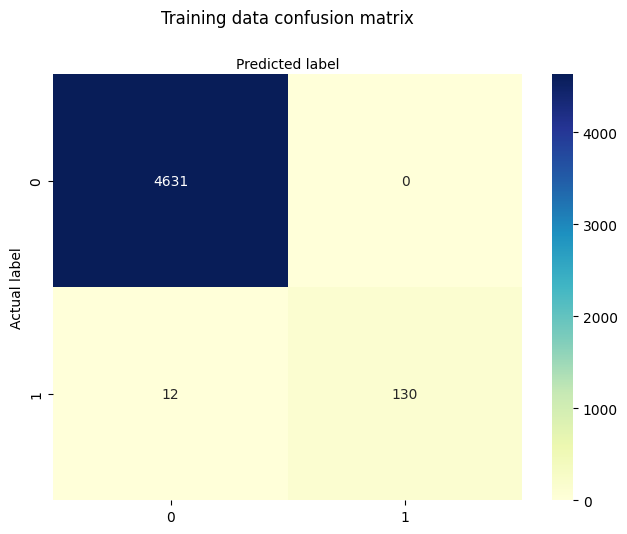

In [ ]:
# Training Data confusion matrix for Extra Tree
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

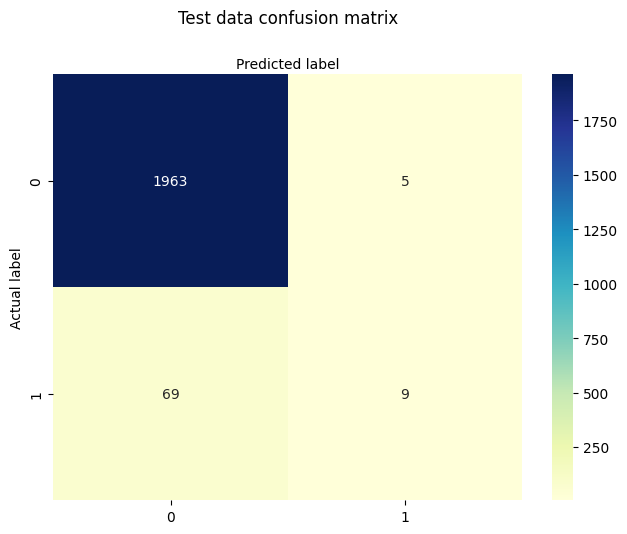

In [ ]:
# Test Data confusion matrix for Extra Tree
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

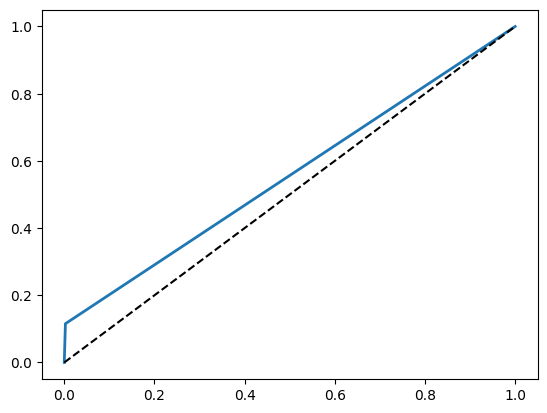

In [ ]:
# Extra Tree ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, extra_tree_y_test_pred)
plt.plot(fpr, tpr, linewidth=2, label="ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

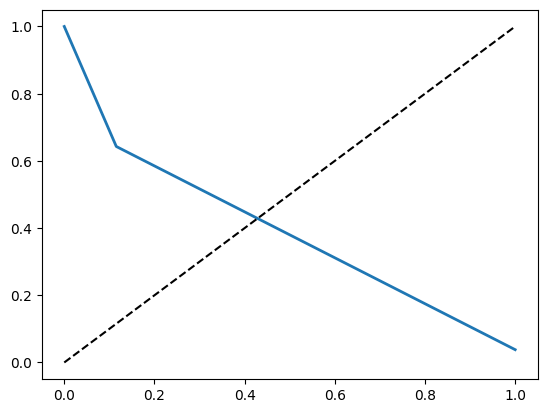

In [ ]:
# Extra Tree Precision vs Recall
precision, recall, thresholds = precision_recall_curve(y_test, extra_tree_y_test_pred)
plt.plot(recall, precision, linewidth=2, label="Precision vs Recall")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [ ]:
# Extra Tree F1 Score
f1_score(y_test, extra_tree_y_test_pred)

0.1956521739130435

In [ ]:
# Extra Trees Best Params
best_params

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 20}